In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv("../data/OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [208]:
df["url"]

0        http://mashable.com/2013/01/07/amazon-instant-...
1        http://mashable.com/2013/01/07/ap-samsung-spon...
2        http://mashable.com/2013/01/07/apple-40-billio...
3        http://mashable.com/2013/01/07/astronaut-notre...
4         http://mashable.com/2013/01/07/att-u-verse-apps/
                               ...                        
39639    http://mashable.com/2014/12/27/samsung-app-aut...
39640    http://mashable.com/2014/12/27/seth-rogen-jame...
39641    http://mashable.com/2014/12/27/son-pays-off-mo...
39642       http://mashable.com/2014/12/27/ukraine-blasts/
39643    http://mashable.com/2014/12/27/youtube-channel...
Name: url, Length: 39644, dtype: object

In [209]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [210]:
df['log_shares'] = np.log(df[" shares"])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 7.000e+00, 1.000e+01, 9.000e+00,
        1.000e+01, 9.000e+00, 1.900e+01, 1.400e+01, 1.400e+01, 1.400e+01,
        1.700e+01, 1.700e+01, 1.900e+01, 3.400e+01, 3.700e+01, 3.300e+01,
        5.600e+01, 1.540e+02, 3.180e+02, 5.820e+02, 9.430e+02, 1.435e+03,
        2.390e+03, 3.022e+03, 3.250e+03, 4.326e+03, 1.740e+03, 2.915e+03,
        3.039e+03, 1.584e+03, 1.803e+03, 1.824e+03, 1.369e+03, 1.064e+03,
        1.223e+03, 8.960e+02, 7.960e+02, 6.950e+02, 5.880e+02, 5.130e+02,
        4.450e+02, 4.000e+02, 3.300e+02, 2.870e+02, 2.230e+02, 2.420e+02,
        1.680e+02, 1.430e+02, 1.330e+02, 7.800e+01, 6.700e+01, 6.100e+01,
        5.100e+01, 5.100e+01, 3.500e+0

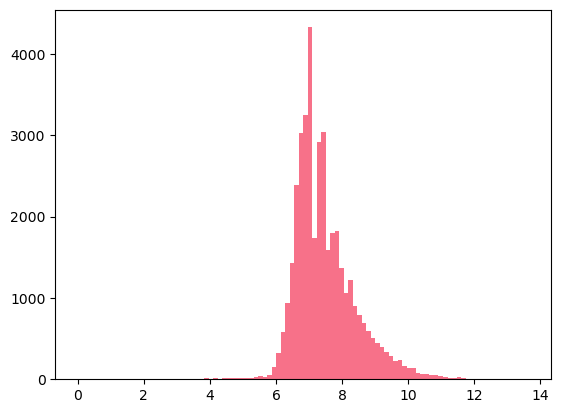

In [211]:
plt.hist(np.log(df[' shares']), bins=100)

<Axes: >

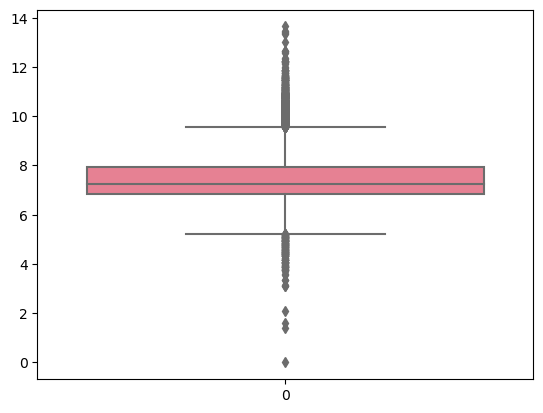

In [212]:
import seaborn as sns
sns.boxplot(df['log_shares'])

In [89]:
list_of_titles = []
for article in df["url"]:
    list_article = article.split("/")
    list_of_titles.append(list_article[-2])
df["title_name"] = list_of_titles

df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,title_name
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,amazon-instant-video-browser
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,ap-samsung-sponsored-tweets
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,apple-40-billion-app-downloads
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,astronaut-notre-dame-bcs
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,att-u-verse-apps


In [90]:
df["title_name"] = df["title_name"].str.split("-")
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,title_name
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,"[amazon, instant, video, browser]"
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,"[ap, samsung, sponsored, tweets]"
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,"[apple, 40, billion, app, downloads]"
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"[astronaut, notre, dame, bcs]"
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,"[att, u, verse, apps]"


In [91]:
question_words = ['who', 'what', 'when', 'where', 'why', 'how', 'which', 'whom', 'whose']

def contains_question_word(word_list):
    return any(word.lower() in question_words for word in word_list)

df['contains_question_word'] = df['title_name'].apply(lambda x: 1 if contains_question_word(x) else 0)

In [92]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,contains_question_word
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.00000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,0.01352
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.11549
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.00000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,0.00000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,0.00000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,0.00000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.00000


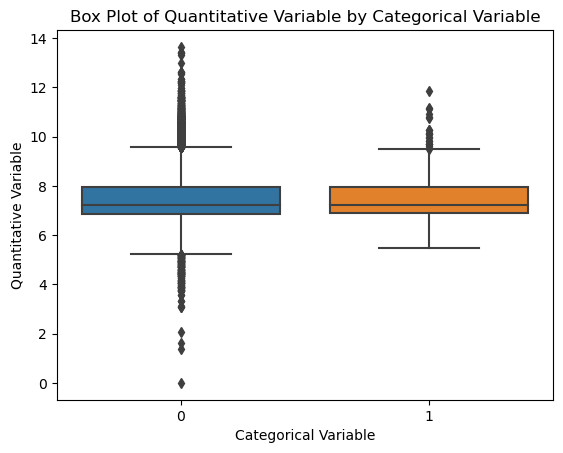

In [123]:
df['log_shares'] = np.log(df[" shares"])
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'quantitative_variable' and 'categorical_variable' columns
sns.boxplot(x='contains_question_word', y='log_shares', data=df)

# Add labels and title
plt.xlabel('Categorical Variable')
plt.ylabel('Quantitative Variable')
plt.title('Box Plot of Quantitative Variable by Categorical Variable')

# Show the plot
plt.show()


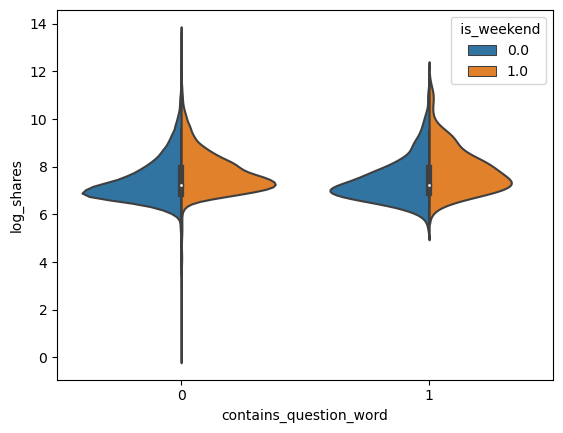

In [126]:
sns.violinplot(x='contains_question_word', y='log_shares', hue=' is_weekend',data=df, split=True)
plt.show()

In [93]:
contain_question_word_df = df[df['contains_question_word'] == 1]

In [94]:
no_question_word_df = df[df['contains_question_word'] == 0]

In [95]:
contain_question_word_df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [97]:
contain_question_word_df = contain_question_word_df[[' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' title_sentiment_polarity', ' shares', 'contains_question_word']]

In [98]:
no_question_word_df = no_question_word_df[[' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' title_sentiment_polarity', ' shares', 'contains_question_word']]

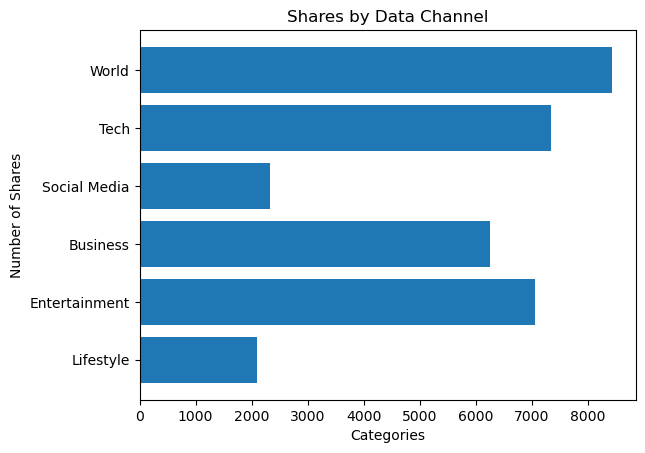

In [114]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
categories = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
values = [
    df[' data_channel_is_lifestyle'].sum(),
    df[' data_channel_is_entertainment'].sum(),
    df[' data_channel_is_bus'].sum(),
    df[' data_channel_is_socmed'].sum(),
    df[' data_channel_is_tech'].sum(),
    df[' data_channel_is_world'].sum()
]

# Create a bar plot
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Shares')
plt.title('Shares by Data Channel')

# Show the plot
plt.show()


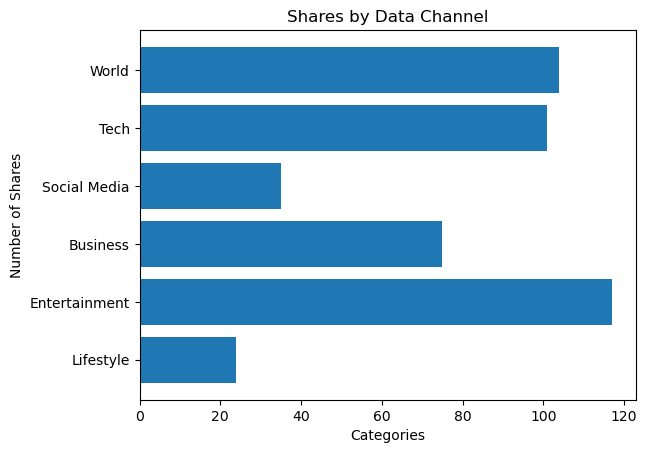

In [115]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
categories = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
values = [
    contain_question_word_df[' data_channel_is_lifestyle'].sum(),
    contain_question_word_df[' data_channel_is_entertainment'].sum(),
    contain_question_word_df[' data_channel_is_bus'].sum(),
    contain_question_word_df[' data_channel_is_socmed'].sum(),
    contain_question_word_df[' data_channel_is_tech'].sum(),
    contain_question_word_df[' data_channel_is_world'].sum()
]

# Create a bar plot
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Shares')
plt.title('Shares by Data Channel')

# Show the plot
plt.show()


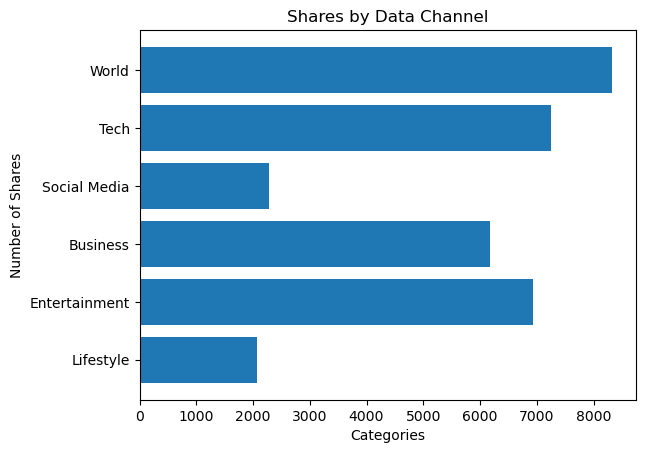

In [116]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
categories = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
values = [
    no_question_word_df[' data_channel_is_lifestyle'].sum(),
    no_question_word_df[' data_channel_is_entertainment'].sum(),
    no_question_word_df[' data_channel_is_bus'].sum(),
    no_question_word_df[' data_channel_is_socmed'].sum(),
    no_question_word_df[' data_channel_is_tech'].sum(),
    no_question_word_df[' data_channel_is_world'].sum()
]

# Create a bar plot
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Shares')
plt.title('Shares by Data Channel')

# Show the plot
plt.show()


In [156]:
Q1 = df[' shares'].quantile(0.25)
Q3 = df[' shares'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for extremely small and large outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Create two separate DataFrames based on the thresholds
small_outliers_df = df[df[' shares'] < lower_threshold]
large_outliers_df = df[df[' shares'] > upper_threshold]

In [158]:
small_outliers_df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares


In [159]:
large_outliers_df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
13,http://mashable.com/2013/01/07/dad-jokes/,731.0,9.0,285.0,0.744186,1.0,0.841530,4.0,2.0,0.0,...,1.0,-0.337889,-0.7000,-0.100,1.000000,-1.000000,0.500000,1.000000,10000,9.210340
16,http://mashable.com/2013/01/07/echo-game/,731.0,8.0,1118.0,0.512397,1.0,0.709770,26.0,18.0,12.0,...,1.0,-0.401437,-1.0000,-0.050,0.566667,-0.100000,0.066667,0.100000,13600,9.517825
18,http://mashable.com/2013/01/07/facebook-sick-app/,731.0,11.0,103.0,0.689320,1.0,0.806452,3.0,1.0,1.0,...,0.5,-0.125000,-0.1250,-0.125,0.857143,-0.714286,0.357143,0.714286,5700,8.648221
19,http://mashable.com/2013/01/07/felt-audio-puls...,731.0,8.0,1207.0,0.410579,1.0,0.548969,24.0,24.0,42.0,...,1.0,-0.226786,-0.5000,-0.050,0.500000,0.000000,0.000000,0.000000,17100,9.746834
36,http://mashable.com/2013/01/07/magisto-ces/,731.0,10.0,1244.0,0.417547,1.0,0.562579,27.0,22.0,20.0,...,1.0,-0.230263,-0.6000,-0.050,1.000000,-0.600000,0.500000,0.600000,7700,8.948976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39588,http://mashable.com/2014/12/26/christmas-subwa...,9.0,10.0,759.0,0.523352,1.0,0.700837,2.0,2.0,21.0,...,1.0,-0.358333,-0.7500,-0.100,0.000000,0.000000,0.500000,0.000000,7600,8.935904
39595,http://mashable.com/2014/12/26/exodus-wont-pla...,9.0,12.0,334.0,0.573171,1.0,0.757895,2.0,1.0,0.0,...,0.6,-0.131250,-0.1875,-0.050,0.000000,0.000000,0.500000,0.000000,6000,8.699515
39598,http://mashable.com/2014/12/26/holiday-decorat...,9.0,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0000,0.000,0.333333,0.250000,0.166667,0.250000,6100,8.716044
39615,http://mashable.com/2014/12/26/toothpaste-fluo...,9.0,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,21.0,...,0.0,0.000000,0.0000,0.000,0.454545,0.136364,0.045455,0.136364,5700,8.648221


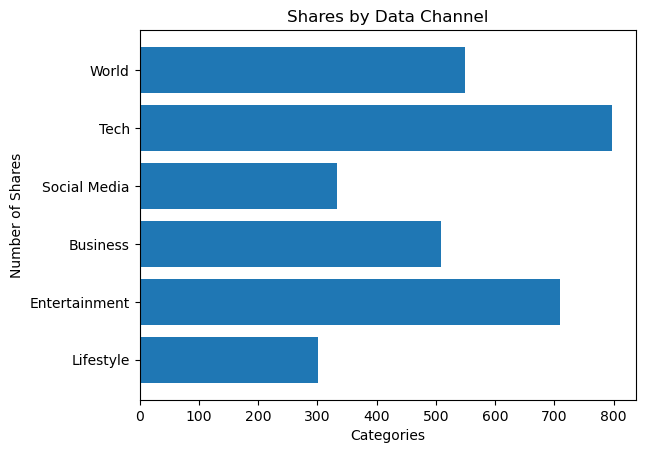

In [160]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
categories = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
values = [
    large_outliers_df[' data_channel_is_lifestyle'].sum(),
    large_outliers_df[' data_channel_is_entertainment'].sum(),
    large_outliers_df[' data_channel_is_bus'].sum(),
    large_outliers_df[' data_channel_is_socmed'].sum(),
    large_outliers_df[' data_channel_is_tech'].sum(),
    large_outliers_df[' data_channel_is_world'].sum()
]

# Create a bar plot
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Shares')
plt.title('Shares by Data Channel')

# Show the plot
plt.show()


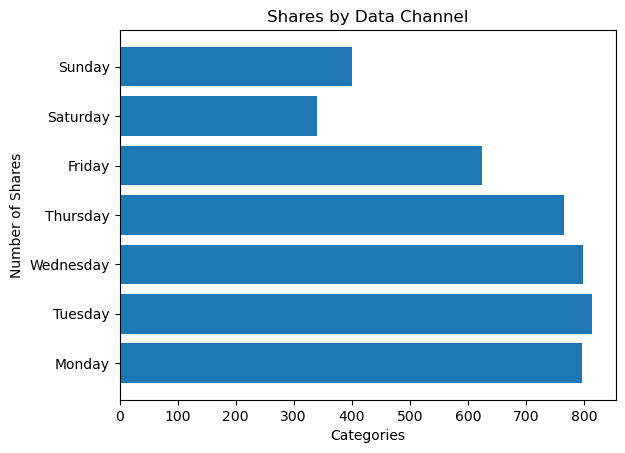

In [166]:
categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
values = [
    large_outliers_df[' weekday_is_monday'].sum(),
    large_outliers_df[' weekday_is_tuesday'].sum(),
    large_outliers_df[' weekday_is_wednesday'].sum(),
    large_outliers_df[' weekday_is_thursday'].sum(),
    large_outliers_df[' weekday_is_friday'].sum(),
    large_outliers_df[' weekday_is_saturday'].sum(),
    large_outliers_df[' weekday_is_sunday'].sum()
    ]

# Create a bar plot
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Shares')
plt.title('Shares by Data Channel')

# Show the plot
plt.show()

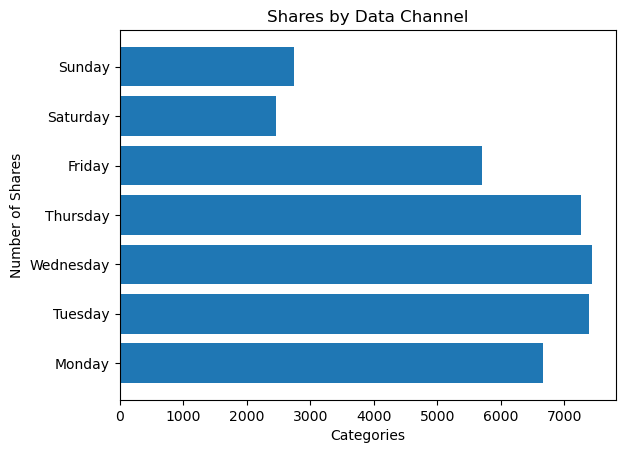

In [167]:
categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
values = [
    df[' weekday_is_monday'].sum(),
    df[' weekday_is_tuesday'].sum(),
    df[' weekday_is_wednesday'].sum(),
    df[' weekday_is_thursday'].sum(),
    df[' weekday_is_friday'].sum(),
    df[' weekday_is_saturday'].sum(),
    df[' weekday_is_sunday'].sum()
    ]

# Create a bar plot
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Shares')
plt.title('Shares by Week Day')

# Show the plot
plt.show()

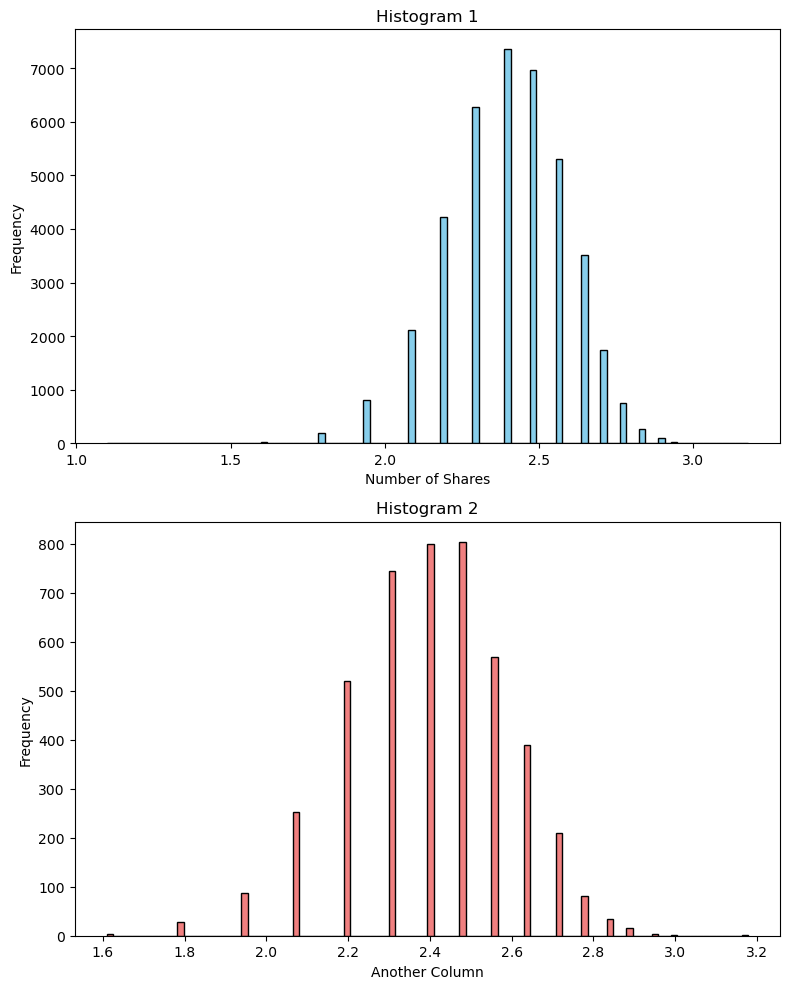

In [187]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a column 'shares'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot the first histogram
axes[0].hist(np.log(df[' n_tokens_title'] + 1), bins=100, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram 1')
axes[0].set_xlabel('Number of Shares')
axes[0].set_ylabel('Frequency')

# Plot the second histogram
axes[1].hist(np.log(large_outliers_df[' n_tokens_title'] + 1), bins=100, color='lightcoral', edgecolor='black')
axes[1].set_title('Histogram 2')
axes[1].set_xlabel('Another Column')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


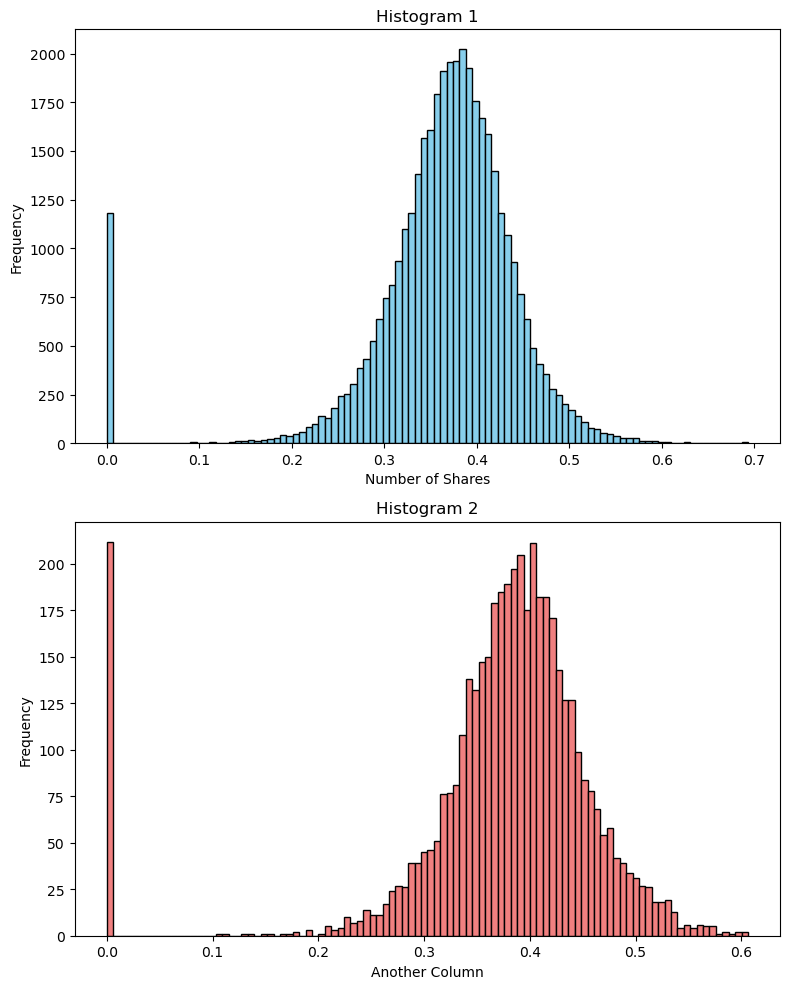

In [189]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a column 'shares'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot the first histogram
axes[0].hist(np.log(df[' global_subjectivity'] + 1), bins=100, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram 1')
axes[0].set_xlabel('Number of Shares')
axes[0].set_ylabel('Frequency')

# Plot the second histogram
axes[1].hist(np.log(large_outliers_df[' global_subjectivity'] + 1), bins=100, color='lightcoral', edgecolor='black')
axes[1].set_title('Histogram 2')
axes[1].set_xlabel('Another Column')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [172]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [180]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,7.474855
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.930486
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,6.852243
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,7.244228
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,7.937375
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,13.645078


In [ ]:

# Assuming 'df' is your DataFrame with specific columns
columns_to_include = [' n_tokens_title', ' n_tokens_content', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',  ' kw_avg_avg', ' self_reference_avg_sharess', 
              ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' avg_positive_polarity', ' avg_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' shares', 'log_shares']



C:\Users\navya\AppData\Local\Temp\ipykernel_20012\3118500562.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='log_shares', y=' global_sentiment_polarity', data=large_outliers_df, palette='husl', legend='full', s=80)


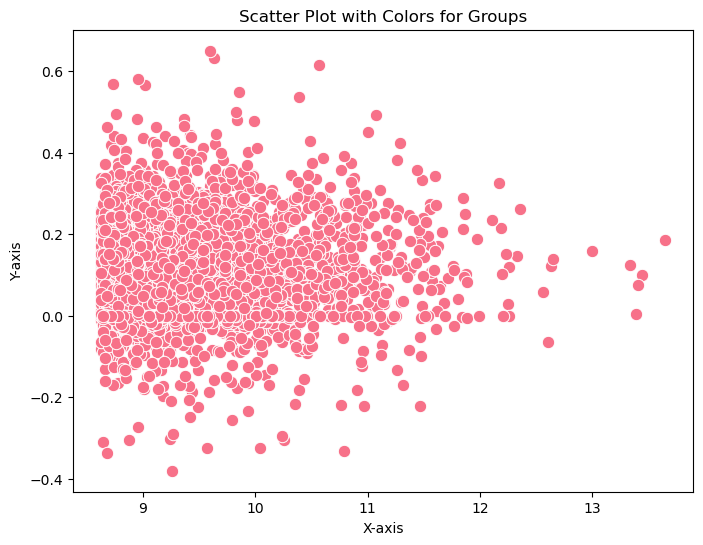

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with columns 'x', 'y', and 'group'
# 'group' is a categorical variable indicating different groups

# Example data generation
import pandas as pd
import numpy as np


# Use Seaborn to set a color palette for the groups
sns.set_palette('husl')

# Create a scatter plot with colors for groups
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_shares', y=' global_sentiment_polarity', data=large_outliers_df, palette='husl', legend='full', s=80)
plt.title('Scatter Plot with Colors for Groups')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


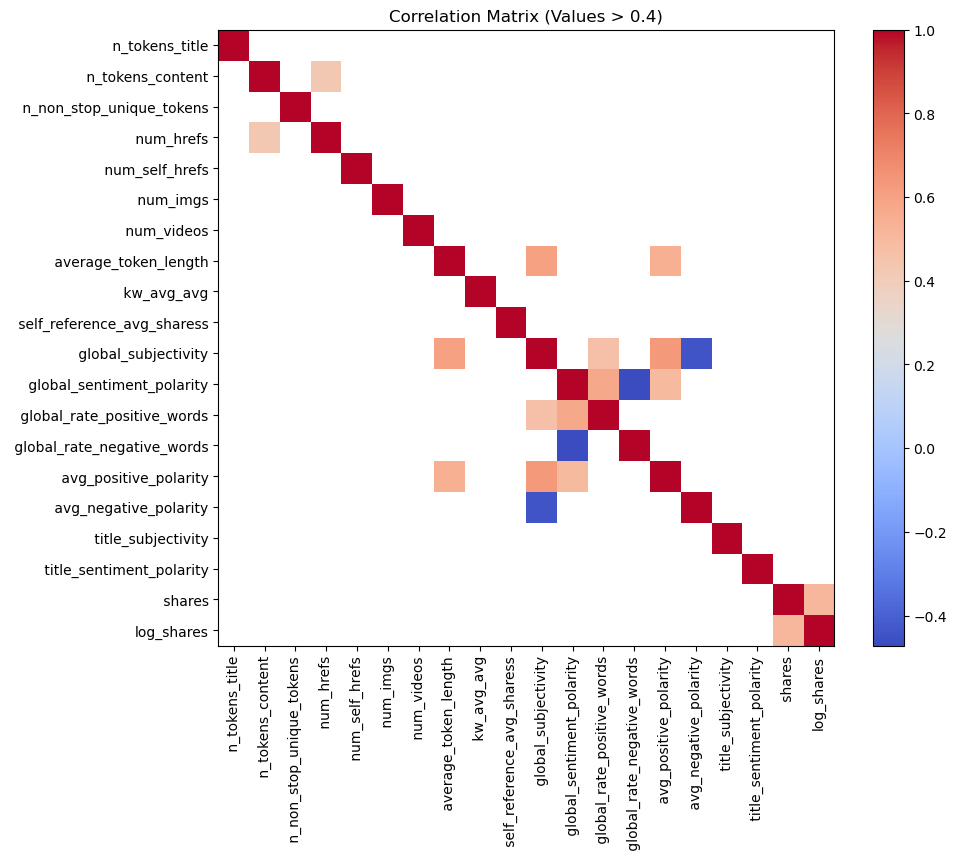

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create a correlation matrix
correlation_matrix = df[columns_to_include].corr()

# Mask values less than absolute 0.4
mask = np.abs(correlation_matrix) > 0.4

# Create a masked correlation matrix
masked_corr_matrix = correlation_matrix[mask]

# Plot the masked correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(masked_corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(masked_corr_matrix.columns)), masked_corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(masked_corr_matrix.index)), masked_corr_matrix.index)
plt.title('Correlation Matrix (Values > 0.4)')
plt.show()


In [217]:
correlation_matrix = df[columns_to_include].corr()

C:\Users\navya\AppData\Local\Temp\ipykernel_20012\42590170.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=' global_subjectivity', y=' average_token_length', data=large_outliers_df, palette='husl', legend='full', s=80)


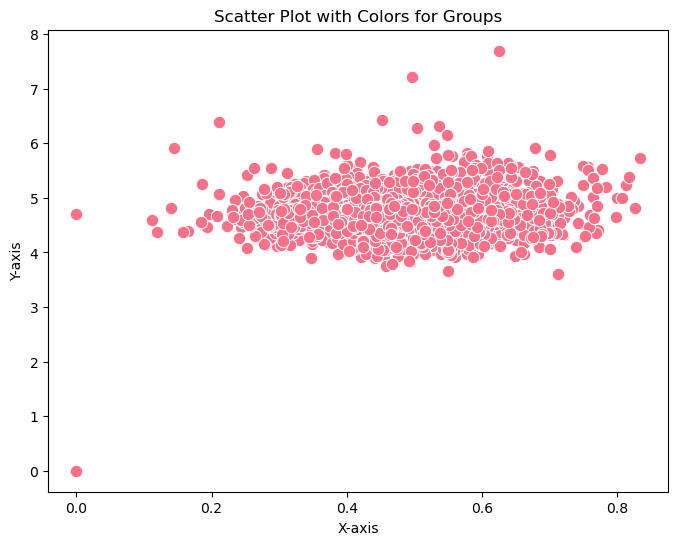

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with columns 'x', 'y', and 'group'
# 'group' is a categorical variable indicating different groups

# Example data generation
import pandas as pd
import numpy as np


# Use Seaborn to set a color palette for the groups
sns.set_palette('husl')

# Create a scatter plot with colors for groups
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' global_subjectivity', y=' average_token_length', data=large_outliers_df, palette='husl', legend='full', s=80)
plt.title('Scatter Plot with Colors for Groups')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


C:\Users\navya\AppData\Local\Temp\ipykernel_20012\3676867365.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=' avg_positive_polarity', y=' average_token_length', data=large_outliers_df, palette='husl', legend='full', s=80)


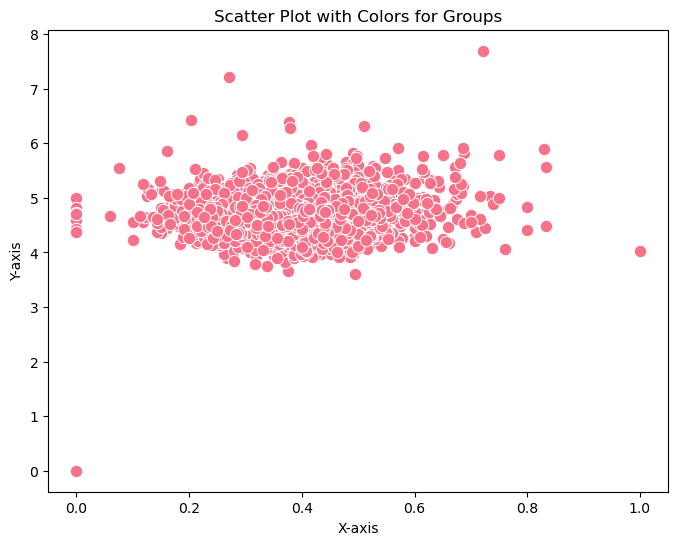

In [220]:
sns.set_palette('husl')

# Create a scatter plot with colors for groups
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' avg_positive_polarity', y=' average_token_length', data=large_outliers_df, palette='husl', legend='full', s=80)
plt.title('Scatter Plot with Colors for Groups')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


C:\Users\navya\AppData\Local\Temp\ipykernel_20012\3442709485.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=' global_subjectivity', y=' avg_negative_polarity', data=large_outliers_df, palette='husl', legend='full', s=80)


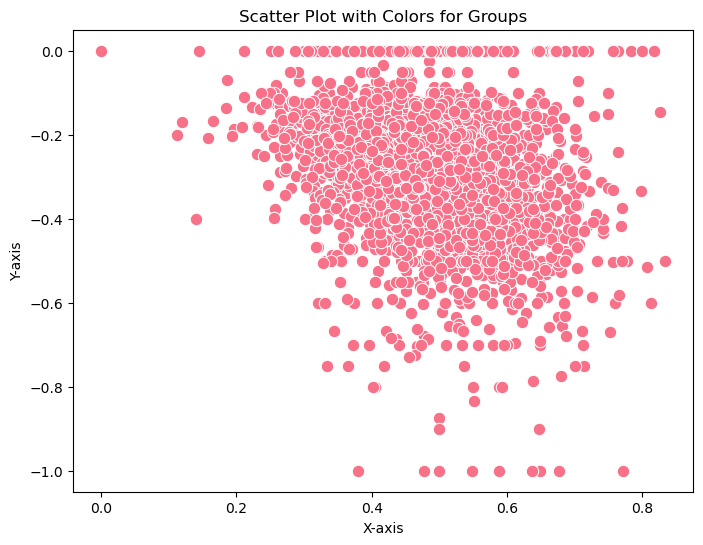

In [221]:
# Use Seaborn to set a color palette for the groups
sns.set_palette('husl')

# Create a scatter plot with colors for groups
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' global_subjectivity', y=' avg_negative_polarity', data=large_outliers_df, palette='husl', legend='full', s=80)
plt.title('Scatter Plot with Colors for Groups')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

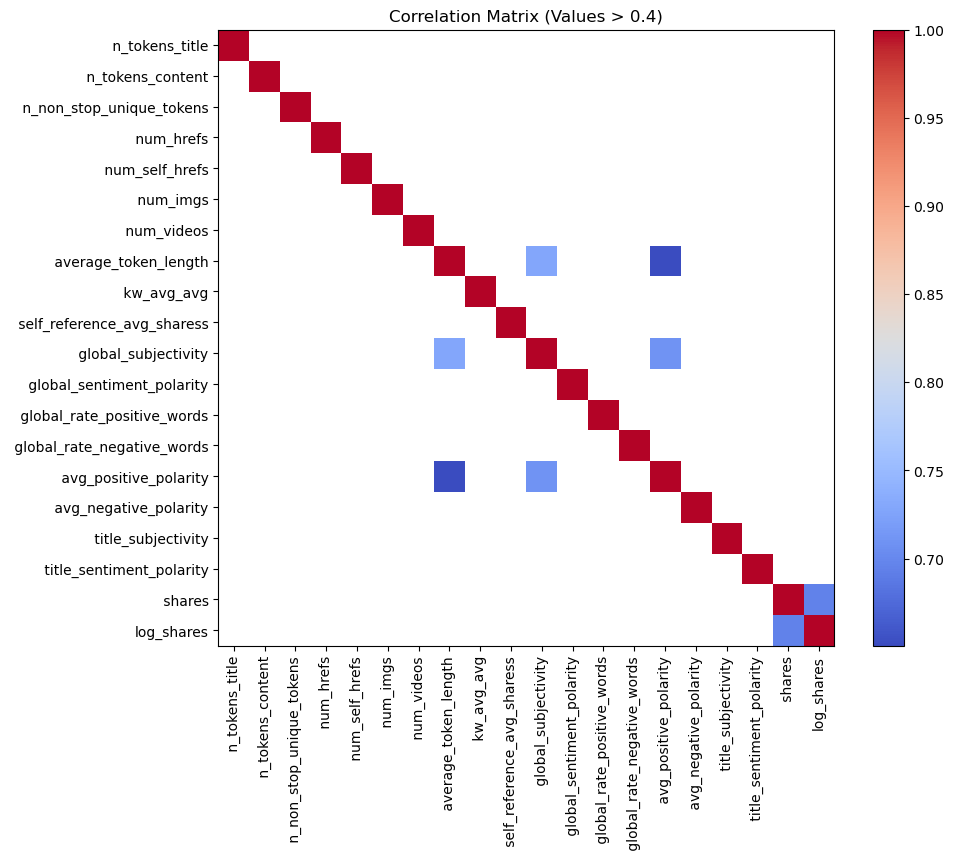

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create a correlation matrix
correlation_matrix = large_outliers_df[columns_to_include].corr()

# Mask values less than absolute 0.4
mask = np.abs(correlation_matrix) > 0.6

# Create a masked correlation matrix
masked_corr_matrix = correlation_matrix[mask]

# Plot the masked correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(masked_corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(masked_corr_matrix.columns)), masked_corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(masked_corr_matrix.index)), masked_corr_matrix.index)
plt.title('Correlation Matrix (Values > 0.4)')
plt.show()
